# Discussion Related With Outliers And Impact On Machine Learning!!

 
1. Which Machine LEarning Models Are Sensitive To Outliers?
2. Naive Bayes Classifier--- Not Sensitive To Outliers
3. SVM-------- Not Sensitive To Outliers
4. Linear Regression---------- Sensitive To Outliers
5. Logistic Regression------- Sensitive To Outliers
6. Decision Tree Regressor or Classifier---- Not Sensitive
7. Ensemble(RF,XGboost,GB)------- Not Sensitive
8. KNN--------------------------- Not Sensitive
9. Kmeans------------------------ Sensitive
10. Hierarichal------------------- Sensitive
11. PCA-------------------------- Sensitive
12. Neural Networks-------------- Sensitive

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("titanic.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().any().value_counts()

False    9
True     3
dtype: int64

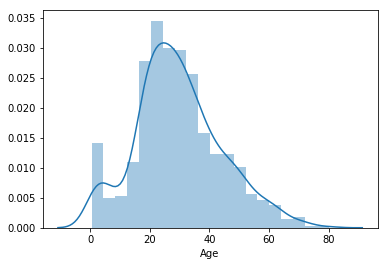

In [4]:
sns.distplot(df['Age'])

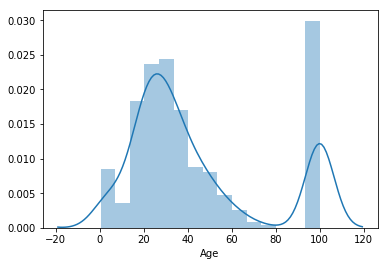

In [5]:
sns.distplot(df['Age'].fillna(100))

# Gaussian Distribution

Text(0, 0.5, 'No of passenger')

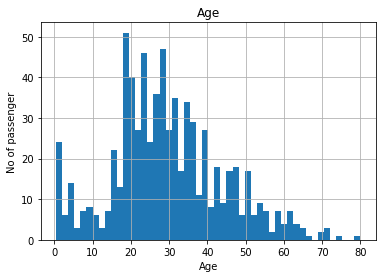

In [6]:
figure=df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

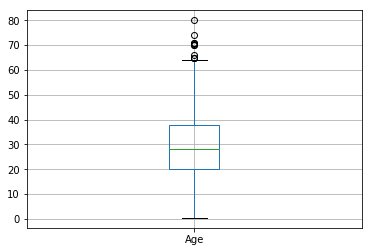

In [7]:
figure=df.boxplot(column="Age")

In [8]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [9]:
##### Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers

upper_boundary=df['Age'].mean() + 3* df['Age'].std()
lower_boundary=df['Age'].mean() - 3* df['Age'].std()
print(lower_boundary), print(upper_boundary),print(df['Age'].mean())

-13.88037434994331
73.27860964406095
29.69911764705882


(None, None, None)

In [10]:
#### Lets compute the Interquantile range to calculate the boundaries
Q3 = df.Age.quantile(0.75)
Q1 = df.Age.quantile(0.25)
IQR = Q3 - Q1
print(IQR)

17.875


In [11]:
lower_bridge=Q1 - (IQR*1.5)
upper_bridge=Q3 + (IQR*1.5)
print(lower_bridge), print(upper_bridge)

-6.6875
64.8125


(None, None)

In [12]:
#### Extreme outliers
lower_bridge=Q1 - (IQR*3)
upper_bridge=Q3 + (IQR*3)
print(lower_bridge), print(upper_bridge)

-33.5
91.625


(None, None)

# If Features Are Skewed We Use the below Technique

Text(0, 0.5, 'No of passenger')

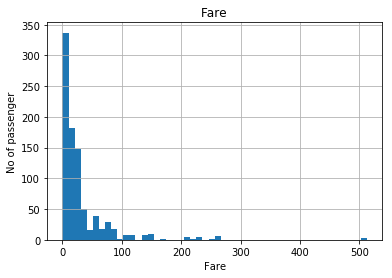

In [13]:
figure=df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

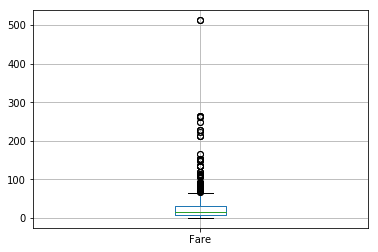

In [14]:
df.boxplot(column="Fare")

In [15]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [16]:
#### Lets compute the Interquantile range to calculate the boundaries
Q3 = df.Fare.quantile(0.75)
Q1 = df.Fare.quantile(0.25)
IQR = Q3 - Q1
print(IQR)

23.0896


In [17]:
lower_bridge=Q1 -(IQR*1.5)
upper_bridge=Q3 +(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-26.724
65.6344


(None, None)

In [18]:
#### Extreme outliers
lower_bridge=Q1 - (IQR*3)
upper_bridge=Q3 + (IQR*3)
print(lower_bridge), print(upper_bridge)

-61.358399999999996
100.2688


(None, None)

In [19]:
data=df.copy()

In [20]:
data.loc[data['Age']>=73,'Age']=73

In [21]:
data.loc[data['Fare']>=100,'Fare']=100


Text(0, 0.5, 'No of passenger')

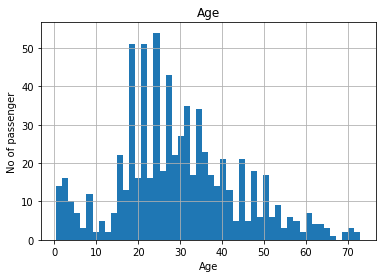

In [22]:

figure=data.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

Text(0, 0.5, 'No of passenger')

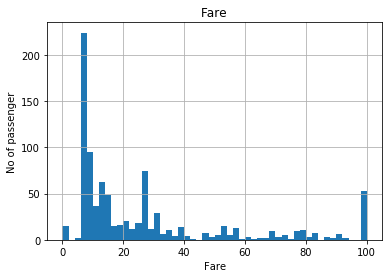

In [23]:

figure=data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3)

In [25]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.664179104477612
roc_auc_score: 0.6855065666041276
